In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
# Filter the main DataFrame to include only North America
north_america_df = df[df["Region"] == "North America"]


In [3]:
#make stress level numeric
stress_mapping = {"Low": 1, "Medium": 2, "High": 3}
north_america_df["Stress Level Numeric"] = north_america_df["Stress_Level"].map(stress_mapping)

# Display the updated DataFrame
north_america_df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Stress Level Numeric
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,2
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,3
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,...,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America,2
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,...,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America,1
13,EMP0014,51,Non-binary,Designer,Manufacturing,5,Hybrid,45,13,1,...,Anxiety,No,Decrease,2,Satisfied,5,Weekly,Poor,North America,1


In [18]:
#get the average stress level in work location industries
Industry_Stress = north_america_df.groupby(["Industry", "Work_Location"])["Stress Level Numeric"].mean().round(2)
Industry_Stress.head(12)

Industry    Work_Location
Consulting  Hybrid           1.94
            Onsite           2.21
            Remote           2.00
Education   Hybrid           2.18
            Onsite           1.98
            Remote           2.00
Finance     Hybrid           2.17
            Onsite           1.90
            Remote           2.02
Healthcare  Hybrid           1.92
            Onsite           1.90
            Remote           2.25
Name: Stress Level Numeric, dtype: float64

# Stress in Healthcare


## Remote work

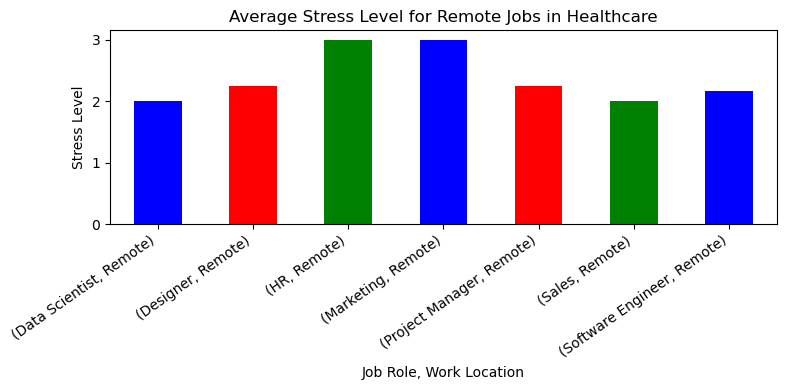

In [7]:
#filter work to be remote in North America specifically in the Healthcare industry 
remote_df = north_america_df[north_america_df["Work_Location"] == "Remote"]
NAHealthcare_df = remote_df[(remote_df["Region"] == "North America") & (remote_df["Industry"] == "Healthcare")]
NAHealthcare_df["Stress_Level"] = NAHealthcare_df["Stress_Level"].map({"Low": 1, "Medium": 2, "High": 3})
Healthcare_Stress = NAHealthcare_df.groupby(["Job_Role", "Work_Location"])["Stress_Level"].mean().round(2)
chart = Healthcare_Stress.plot(color=["Blue", "Red", "Green"], kind="bar", figsize=(8,4))
chart.set_xlabel("Job Role, Work Location")
chart.set_ylabel("Stress Level")
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, ha='right')
chart.set_title("Average Stress Level for Remote Jobs in Healthcare") 
plt.savefig("Average Stress Level for Remote Jobs in Healthcare.png", bbox_inches='tight')
plt.tight_layout()
plt.show()


Analysis: Focusing on the North American continent Healthcare seems to have the highest average stress level for remote work compared to other industries in the region. As an industry Healthcare has several job roles that are remote and the graph shows which is averaging a higher level of stress based on their remote jobs. HR and Marketing in the healthcare system seems to be the highest of all. 
